In [3]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
boston = load_boston()
boston.keys()

C:\Users\yttn0\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing d

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
boston["data"]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
# x, y 데이터 셋 추출
x_data = boston.data
y_data = boston.target.reshape(boston.target.size,1) # n * 1 형태로 변환
y_data.shape

(506, 1)

In [7]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,5)).fit(x_data) 
x_scaled_data = minmax_scale.transform(x_data) # (2)
x_scaled_data[:3] 

array([[0.00000000e+00, 9.00000000e-01, 3.39076246e-01, 0.00000000e+00,
        1.57407407e+00, 2.88752635e+00, 3.20803296e+00, 1.34601570e+00,
        0.00000000e+00, 1.04007634e+00, 1.43617021e+00, 5.00000000e+00,
        4.48399558e-01],
       [1.17961270e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 2.73998850e+00, 3.91349125e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 5.00000000e+00,
        1.02235099e+00],
       [1.17848872e-03, 0.00000000e+00, 1.21151026e+00, 0.00000000e+00,
        8.64197531e-01, 3.47192949e+00, 2.99691040e+00, 1.74480990e+00,
        2.17391304e-01, 5.24809160e-01, 2.76595745e+00, 4.94868627e+00,
        3.17328918e-01]])

In [8]:
# 데이터분류(test- train)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y_data, test_size = 0.33)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((339, 13), (167, 13), (339, 1), (167, 1))

In [10]:
from sklearn import linear_model
regr = linear_model.LinearRegression(fit_intercept=True,normalize=False,copy_X=True, n_jobs=8)
lasso_regr = linear_model.Lasso(alpha=0.01, fit_intercept=True,normalize=False,copy_X=True)
ridge_regr = linear_model.Ridge(alpha=0.01, fit_intercept=True,normalize=False,copy_X=True)
SGD__regr = linear_model.SGDRegressor(penalty="l2",alpha=0.01, max_iter=1000,tol=0.001, eta0=0.01)


In [11]:
regr.fit(X_train, y_train)

C:\Users\yttn0\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(n_jobs=8, normalize=False)

In [12]:
print('Coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)

Coefficients:  [[-1.64469067  1.13790035  0.21808214  0.55415358 -1.96132617  3.1559169
   0.4079385  -3.17064564  1.74159808 -1.59545465 -1.7392829   0.63078413
  -4.87854453]]
intercept:  [29.0947887]


In [13]:
regr.predict(x_data[:5]) # 예측하기

array([[-187.6659558 ],
       [-141.43431217],
       [-123.92239285],
       [ -96.74102299],
       [-103.13227671]])

In [14]:
x_data[:5].dot(regr.coef_.T) + regr.intercept_ # 수식 그대로 재현

array([[-187.6659558 ],
       [-141.43431217],
       [-123.92239285],
       [ -96.74102299],
       [-103.13227671]])

In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = regr.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat),mean_squared_error(y_true, y_hat)

(0.7144868049801104, 3.4160115109643976, 23.074842884274382)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

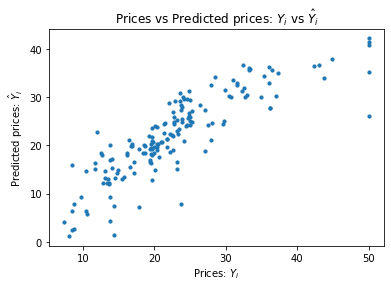

In [17]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")